In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
# Let us see dataset characteristics
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)

(32, 32, 3)


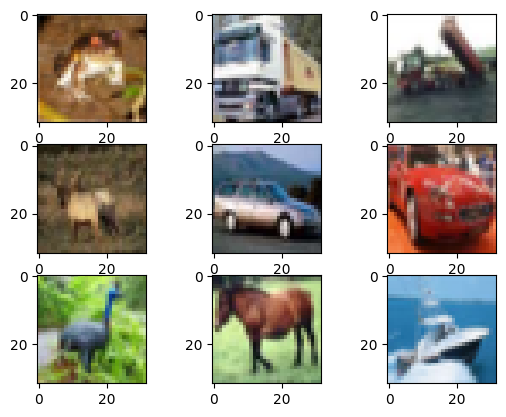

In [7]:
# Create grid of 3x3 images
for i in range(0,9):
  plt.subplot(330+1+i)
  img = X_train[i]
  plt.imshow(img)
plt.show()

In [8]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [9]:
# Preprocess the data

# Normalizing 0-255 to 0.0 to 1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [10]:
# Class Label Shape

print(Y_train.shape)
print(Y_train[0])

(50000, 1)
[6]


In [11]:
# One-Hot Encoding

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_class = Y_train.shape[1]

print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [14]:
# Define Model

def ALL_CNN(weights=None):

  # Define model type
  model = Sequential()

  # Define layers
  model.add(Conv2D(96, (3,3), padding = 'same', input_shape = (32,32,3)))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3,3), padding = 'same', strides = (2,2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(192, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3,3), padding = 'same', strides = (2,2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(192, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1,1), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(10, (1,1), padding = 'valid'))

  # Add global average pooling layer with softmax activation
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))

  # Load Weights
  if weights:
    model.load_weights(weights)

  return model

In [15]:
# Define Hyperparameters
lr = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build Model
model = ALL_CNN()

# Define Optimizer and Compile model
sgd = SGD(lr = lr, decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout (Dropout)           (None, 16, 16, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# Define training parameters
epoch = 350
batch_size = 32

# Fit the model
model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/350
 147/1563 [=>............................] - ETA: 32:15 - loss: 2.3009 - accuracy: 0.1078

KeyboardInterrupt: ignored

In [17]:
# Define Hyperparameters
lr = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build Model and define weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = ALL_CNN(weights)

# Define Optimizer and Compile model
sgd = SGD(lr = lr, decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# Print model summary
print(model.summary())

# Test model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose = 1)
print(scores[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 192)      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Trainable params: 1,369,738
Non-trainable params: 0
_________________________________________________________________
None
313/313 [==============================] - 112s 352ms/step - loss: 0.5152 - accuracy: 0.9088
0.9088000059127808


In [20]:
# make dictionary of class labels and names

classes = range(0,10)

names = ['ap','car','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'ap', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [21]:
import numpy as np

# Generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

# Make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 266ms/step


In [22]:
print(predictions.shape)
print(predictions[0])

(9, 10)
[4.5647404e-18 1.0581064e-20 1.8923349e-10 2.1411525e-11 9.9999923e-01
 2.8037576e-07 3.1478845e-13 4.2381566e-07 1.3699609e-19 1.2097111e-18]


In [23]:
# Use np.argmax to convert class probabilities to class labels
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


In [24]:
print(labels)

[4 5 6 3 1 1 3 6 8]


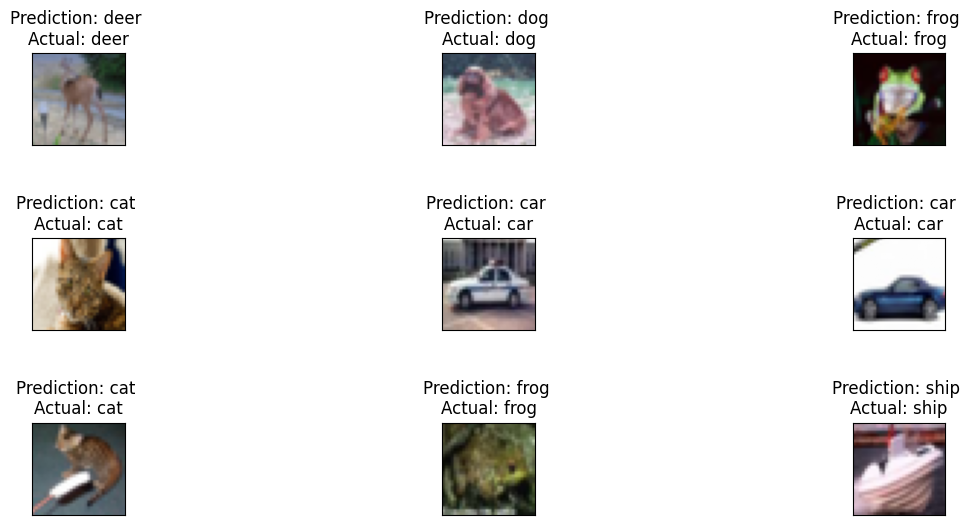

In [25]:
# Create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

  # Determine label for each prediction, set title
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = "Prediction: {} \nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # Plot the image
  axs[i].imshow(img)

plt.show()